# Bunch of imports

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
try:
    from scipy.special import logsumexp
except:
    from scipy.misc import logsumexp        


# Define some useful functions

We create a simple example in which two agents hold a belief *x* on a binary opinion dimension with possible outcomes *a* or *b*, represented as a discrete probability mass function over the possible outcomes.

In [18]:
d={}
d['a'] = [.2,.3]
d['b'] = [.8,.7]
df = pd.DataFrame.from_dict(d)
df

,a,b
0,0.2,0.8
1,0.3,0.7


We then define a posterior distribution over outcomes, using their initial opinions as input to the simple Bayesian formula:

In [12]:
#this is equivalent to the logarithmic opinion pool (Satopaa et al 2014)
def posterior(df):
    # transform opinions to avoid 0 and 1
    df = .01 + df * .98 # transform to avoid 0 and 1
    # this formulation avoids problems with very small numbers
    num = np.sum(np.log(df), axis=0) 
    den = logsumexp(np.sum(np.log(df), axis=0)) 
    return np.exp(num - den)


We then define a function that simply moves the agent's belief toward the optimal posterior point. 

In [43]:
def update(prior, posterior, alpha=.5, nopts=2):
    baseline = 1 / nopts
    delta = posterior - prior
    updated = prior + alpha * delta
    return updated

The result shows the posterior probability distribution over possible outcomes that is the optimal information integration between the original opinions. This represents the optimal integration (which takes into account the uncertainty associated with each piece of evidence), assuming no noise in the opinion reporting process.

In [26]:
p = posterior(df)
p

a    0.101787
b    0.898213
dtype: float64

plot update function with this posterior and alpha=.5

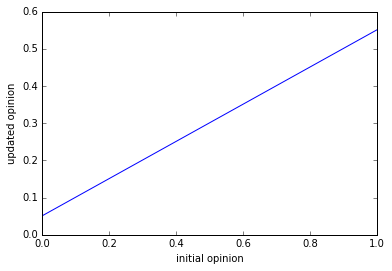

In [53]:
x = np.linspace(0,1,50)
plt.plot(x,update(x,p[0]))
plt.xlabel('initial opinion')
plt.ylabel('updated opinion')

# NOTE!

With the above formulation we first compute the posterior and then we tell each agent to move a fractional amount of the distance from their current opinion to this posterior. However, a possibly more concise way of obtaining the same result is to include the weight on the "self" opinion and on the "other" opinion in the original Bayes formula. Pros: I have seen this in the literature and it's elegant. Cons: I am not sure is just a linear function. 

In [54]:
def elegant(df,alpha=):
    # transform opinions to avoid 0 and 1
    df = .01 + df * .98 # transform to avoid 0 and 1
    
    # define alpha as the weight on the self opinion and 1-alpha as the weight on the other
    # also assumes that df.iloc[0] is self and df.iloc[1] is the other
    sw = .8
    ow = 1-alpha
    
    # something along these lines
    df.iloc[0] = df.iloc[0] ** alpha
    df.iloc[1] = df.iloc[1] ** (1-alpha)
    
    # this formulation avoids problems with very small numbers
    num = np.sum(np.log(df), axis=0) 
    den = logsumexp(np.sum(np.log(df), axis=0)) 
    return np.exp(num - den)


However, this is not symmetric for equivalent values. For example, an opinion of (.2,.8) should be equivalent and behave similarly to an opinion of (.8,.2), because they have the same confidence, but on opposite outcomes. However you can see from the graph below that this is not the case. So maybe we should think about how to change it appropriately. 

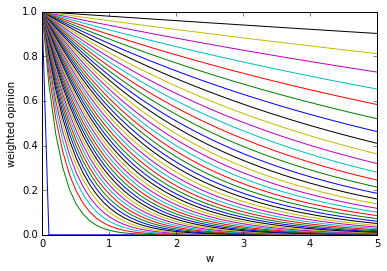

In [70]:
w = np.linspace(0,5,50)
for x in np.linspace(0,1,50):
    plt.plot(w,x**w)
    plt.xlabel('w')
    plt.ylabel('weighted opinion')

In [61]:
.8**y

array([1.        , 0.97748752, 0.95548186, 0.9339716 , 0.91294558,
       0.89239292, 0.87230295, 0.85266525, 0.83346964, 0.81470618,
       0.79636512, 0.77843697, 0.76091243, 0.74378241, 0.72703802,
       0.7106706 , 0.69467164, 0.67903286, 0.66374615, 0.64880358,
       0.63419741, 0.61992005, 0.60596412, 0.59232237, 0.57898772,
       0.56595328, 0.55321227, 0.54075809, 0.52858429, 0.51668455,
       0.5050527 , 0.49368271, 0.48256869, 0.47170487, 0.46108563,
       0.45070545, 0.44055896, 0.43064088, 0.42094609, 0.41146955,
       0.40220635, 0.39315169, 0.38430087, 0.37564931, 0.36719251,
       0.3589261 , 0.35084579, 0.34294738, 0.33522678, 0.32768   ])